# A

### a. Exploratory Data Analysis

In [ ]:
# i. Tampilkanlah 10 data pertama

import pandas as pd
klaimlayananrs = pd.read_csv('bpjs_data_sample_uts.csv')
klaimlayananrs.head(10)

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,label
0,146797,1601,302,SC,P,41,2,0,Q,0,r00_r99,0
1,140617,2302,238,C,P,32,1,3,O,1,o00_o99,0
2,132452,1403,271,C,L,58,1,4,L,1,l00_l99,0
3,145696,2605,369,C,L,0,1,2,P,1,p00_p96,0
4,184924,206,32,SB,L,15,2,0,Q,0,r00_r99,0
5,179905,401,69,SC,L,4,2,0,Q,0,s00_t98,0
6,191619,1111,158,SC,L,62,2,0,M,0,m00_m99,0
7,128821,1006,130,SB,P,64,2,0,Q,0,j00_j99,0
8,179034,1307,196,KM,P,69,2,0,Q,0,z00_z99,0
9,112613,1301,217,KM,P,59,2,0,H,0,h00_h59,0


In [ ]:
# ii. Tampilkan rangkuman data set yang meliputi count, mean, standard deviation, minimum value, 
# quantile 1 (25%), quantile 2 (50%), quantile 3 (75%), dan maximum value hanya untuk atribut 
# los (length of stay) dan umur.

umurlos = ['los', 'umur']
df = klaimlayananrs[umurlos]
df.describe()

,los,umur
count,20000.000000,20000.000000
mean,1.290950,36.753700
std,5.713986,23.092401
min,0.000000,0.000000
25%,0.000000,17.000000
50%,0.000000,39.000000
75%,2.000000,56.000000
max,555.000000,104.000000


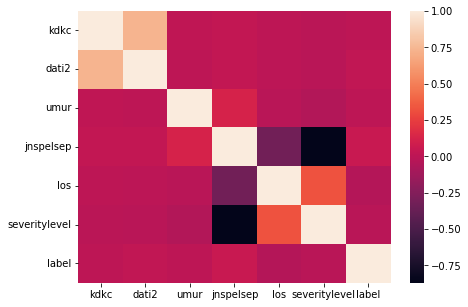

In [ ]:
# iii. Tampilkanlan correlation heatmap untuk atribut kdkc, dati2, typeppk, umur,
# jnspelsep, los (length of stay), severitylevel, dan label.

import matplotlib.pyplot as plt
import seaborn as sns

atributrelate = ['kdkc', 'dati2', 'typeppk', 'umur', 'jnspelsep', 'los', 'severitylevel', 'label']
korelasi = klaimlayananrs[atributrelate].corr()

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(korelasi, ax = ax);

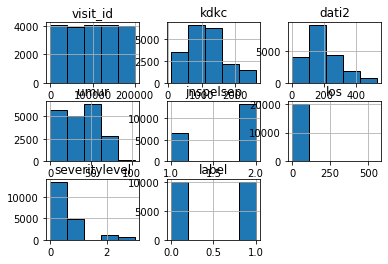

In [ ]:
# iv. Tampilkan histogram untuk semua atribut

klaimlayananrs.hist(edgecolor='black', bins=5);

### b. Data Preprocessing

In [ ]:
#i. Lakukanla imputasi data dengan nilai modus  jika terdapat nilai null 
klaimlayananrs.isnull().sum()

visit_id         0
kdkc             0
dati2            0
typeppk          0
jkpst            0
umur             0
jnspelsep        0
los              0
cmg              0
severitylevel    0
diagprimer       0
label            0
dtype: int64

In [ ]:
#ii. transformasi data untuk semua data kategorikal sehingga semua fitur memiliki nilai numerik dengan menggunakan one-hot encoding.
klaimlayananrs.drop(['visit_id'], axis=1, inplace=True)

In [ ]:
klaimlayananrs['jkpst'].replace(to_replace=['L', 'P'], value =[0, 1], inplace=True)

In [ ]:
import numpy as np
# bpjs_data with numeric data type
data_num = klaimlayananrs.select_dtypes(include=[np.number])

# bpjs_data with category data type
data_cat = klaimlayananrs.select_dtypes(exclude=[np.number])

# Get dummies (data transformation)
transform_cat = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [ ]:
from numpy.core.defchararray import add
data_cat = transform_cat.assign(new=add('', np.arange(1, len(data_cat) + 1).astype(str)))
data_num = data_num.assign(new=add('', np.arange(1, len(data_num) + 1).astype(str)))
bpjs_data_final = pd.concat([data_cat, data_num], axis=1)
bpjs_data_final.drop(['new'], axis=1, inplace=True)

In [ ]:
bpjs_data_final

,typeppk_B,typeppk_C,typeppk_D,typeppk_GD,typeppk_HD,typeppk_I1,typeppk_I2,typeppk_I3,typeppk_I4,typeppk_KB,...,diagprimer_u00_u85,diagprimer_z00_z99,kdkc,dati2,jkpst,umur,jnspelsep,los,severitylevel,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1601,302,1,41,2,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,2302,238,1,32,1,3,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1403,271,0,58,1,4,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,2605,369,0,0,1,2,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,206,32,0,15,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,1,0,0,0,0,0,0,...,0,0,1006,131,1,1,1,3,1,1
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,1808,237,0,82,2,0,0,1
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,1601,302,0,4,2,0,0,1
19998,1,0,0,0,0,0,0,0,0,0,...,0,0,1016,117,0,0,2,0,0,1


### c. Data Mining

In [ ]:
#i.Lakukanla pembagian data: training data (80%) dan testing data (20%).
from sklearn.model_selection import train_test_split

X = bpjs_data_final.iloc[:,:-1].values
y = bpjs_data_final.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
#Pada proses training anda harus menggunakan 5-fold Cross-Validation.
#ii.Terapkanla klasifikasi dengan menggunakan KNN (k-nearest neighbors) dengan nilai K = 4
# Create KNN classifier
from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
k = 4
i = 0
kf = KFold(n_splits=k, random_state=None)
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

for train_index, test_index in kf.split(X_train, y_train):
    i = i + 1
    X_train_fold, X_test_fold= X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold= y_train[train_index], y_train[test_index]
    print('fold: ' +  str(i))
    
    knn.fit(X_train_fold, y_train_fold)
    y_train_pred = knn.predict(X_train_fold)
    y_pred = knn.predict(X_test_fold)
    
    train_acc = accuracy_score(y_train_fold, y_train_pred)
    train_prec = metrics.precision_score(y_train_fold, y_train_pred)
    train_rec = metrics.recall_score(y_train_fold, y_train_pred)
    
    test_acc = accuracy_score(y_test_fold, y_pred)
    test_prec = metrics.precision_score(y_test_fold, y_pred)
    test_rec = metrics.recall_score(y_test_fold, y_pred)
    
    print('Train accuracy:', train_acc)
    print("Train Precision:",train_prec)
    print("Train Recall:",train_rec)
    print('Test accuracy:', test_acc)
    print("Test Precision:",test_prec)
    print("Test Recall:",test_rec)

fold: 1
Train accuracy: 0.7213333333333334
Train Precision: 0.7173806006893156
Train Recall: 0.7293509093942934
Test accuracy: 0.56775
Test Precision: 0.5662122687439143
Test Recall: 0.5812093953023488
fold: 2
Train accuracy: 0.71875
Train Precision: 0.7129327237099935
Train Recall: 0.729734247033261
Test accuracy: 0.5535
Test Precision: 0.555610479485912
Test Recall: 0.5589259075087022
fold: 3
Train accuracy: 0.721
Train Precision: 0.7204156889037882
Train Recall: 0.7189695550351288
Test accuracy: 0.56725
Test Precision: 0.5714285714285714
Test Recall: 0.5654761904761905
fold: 4
Train accuracy: 0.7209166666666667
Train Precision: 0.7177694683791254
Train Recall: 0.732415394824154
Test accuracy: 0.5605
Test Precision: 0.549476688867745
Test Recall: 0.5874872838250255


In [ ]:
# iii. Berapakah nilai accuracy, precision, dan recall yang anda peroleh
y_pred = knn.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_pred.round())
test_prec = metrics.precision_score(y_test, y_pred.round())
test_rec = metrics.recall_score(y_test, y_pred.round())

print('Test accuracy:', test_acc)
print("Test Precision:",test_prec)
print("Test Recall:",test_rec)

Test accuracy: 0.5675
Test Precision: 0.563302752293578
Test Recall: 0.6121635094715853


# B

### a. Data Preprocessing

In [ ]:
import pandas as pd
klaimlayananrs = pd.read_csv('bpjs_data_sample_uts.csv')

In [ ]:
import numpy as np
# bpjs_data with numeric data type
data_num = klaimlayananrs.select_dtypes(include=[np.number])

# bpjs_data with category data type
data_cat = klaimlayananrs.select_dtypes(exclude=[np.number])

# Get dummies (data transformation)
transform_cat = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [ ]:
from numpy.core.defchararray import add
data_cat = transform_cat.assign(new=add('', np.arange(1, len(data_cat) + 1).astype(str)))
data_num = data_num.assign(new=add('', np.arange(1, len(data_num) + 1).astype(str)))
bpjs_data_final = pd.concat([data_cat, data_num], axis=1)
bpjs_data_final.drop(['new'], axis=1, inplace=True)

In [ ]:
# split features (X) and label (y)
X = bpjs_data_final.iloc[:,:-1].values
y = bpjs_data_final.iloc[:, -1].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
X

array([[0, 0, 0, ..., 2, 0, 0],
       [0, 1, 0, ..., 1, 3, 1],
       [0, 1, 0, ..., 1, 4, 1],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [1, 0, 0, ..., 2, 0, 0],
       [0, 1, 0, ..., 2, 0, 0]], dtype=int64)

In [ ]:
# i. Lakukan perubahan skala pada setiap fitur dengan menggunakan normalisasi sehingga setiap nilai berada pada skala di antara 0-1.
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)

In [ ]:
X

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.00540541,
        0.33333333],
       [0.        , 1.        , 0.        , ..., 0.        , 0.00720721,
        0.33333333],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# ii. Pilihla 5 fitur terbaik dari fitur yang ada dengan menggunakan library feature selection pada sklearn
from sklearn.feature_selection import SelectKBest, chi2, f_regression
X_new=SelectKBest(score_func=chi2,k=5).fit_transform(X,y)

In [ ]:
X_new

array([[0.        , 1.        , 0.        , 0.        , 0.73322011],
       [0.        , 0.        , 0.        , 0.        , 0.70235021],
       [0.        , 0.        , 0.        , 0.        , 0.66156497],
       ...,
       [0.        , 1.        , 0.        , 0.        , 0.42409651],
       [0.        , 0.        , 0.        , 0.        , 0.04063538],
       [0.        , 0.        , 0.        , 0.        , 0.08355354]])

### b. Building Model (Classifier)

In [ ]:
# a. Lakukanla pembagian data dengan menggunakan 5-fold Cross-Validation.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [ ]:
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(X_test))

Banyak data latih setelah dilakukan Train-Validation Split:  14000
Banyak data uji setelah dilakukan Train-Validation Split:  6000


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1)
scores = cross_val_score(model, X, y, cv = 5)
print("Akurasi model SVM untuk tiap fold: ", scores)
print("Akurasi model SVM dengan 5-Fold Cross Validation: ", scores.mean())

Akurasi model SVM untuk tiap fold:  [0.9945  0.99475 0.9925  0.9925  0.99525]
Akurasi model SVM dengan 5-Fold Cross Validation:  0.9939


In [ ]:
# b. Terapkanla klasifikasi dengan menggunakan Decision Tree dengan parameter
# (max_dept = 5 dan min_samples_split=4)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth = 5,
    min_samples_split = 4
)

In [ ]:
# c. Berapakah nilai accuracy, precision, dan recall yang anda peroleh.
from sklearn import metrics

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_pred.round())
test_prec = metrics.precision_score(y_test, y_pred.round())
test_rec = metrics.recall_score(y_test, y_pred.round())

print('Test accuracy:', test_acc)
print("Test Precision:",test_prec)
print("Test Recall:",test_rec)

Test accuracy: 0.9998333333333334
Test Precision: 1.0
Test Recall: 0.9996619337390128
